<h2>Monte-Carlo Demonstration. Evolution of randomness</h2>

<p>To demonstrate Monte Carlo simulations - you can find Pi by creating a circlular area and a rectangular area within a fixed box - Then pick random co-oordinates and determine if the random co-ordinate is in the rectangular area or the circular area.

If you make the radius of the cicular area = the width of the square box - then as you pick more co-ordinates randomly, then do the division of the number of co--ords in the circle / the number of co--ords in the square then you will get Pi!
</p>




<IPython.core.display.Javascript object>


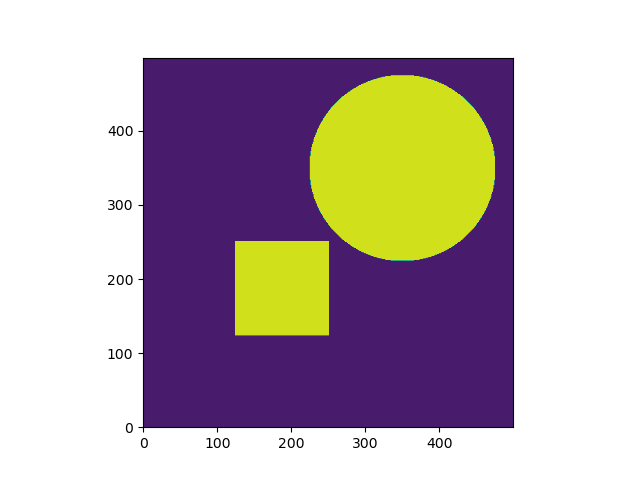

<ipython-input-1-6751a54f0d71>:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

SimBoxSize = 500
x = np.arange(0, SimBoxSize, 1)
y = np.arange(0, SimBoxSize, 1)
xx, yy = np.meshgrid(x, y, sparse=True)

r = 125

def InSquare(i,j):
    if(i >= r and i <= 2 * r and j >= r and j <= 2 * r):
        return 1
    else:
        return 0
    
    


def InCircle(i,j):
    if(pythDiff(i,j) < r):
        return 1
    else:
        return 0

circleX = 350
circleY = 350

def pythDiff(i,j):
    return ((circleX-i)**2 + (circleY - j)**2)**0.5



def InShapes(i,j):
    if(InCircle(i,j) ==1 or InSquare(i,j)==1):
        return 1
    else:
        return 0


vInSquare = np.vectorize(InShapes)

z = vInSquare(xx,yy)
h = plt.contourf(x,y,z)

plt.axes().set_aspect('equal')
plt.show()

In [2]:
#Now lets drop co-ordinates randomly and see if the land in the Circle or the Square (we can re-use the methods created earlier
#which were used to draw the circle and square)
def IsCoordInCircle(x):    
    return InCircle(x[0], x[1]) 

def IsCoordInSquare(x):    
    return InSquare(x[0], x[1])   

def CalcPi(n):
    
    coords = np.random.randint(SimBoxSize, size=(n, 2))

    df = pd.DataFrame(coords)
    df["InCircle"] = 0
    df["InSquare"] = 0

    return(df.apply(IsCoordInCircle, axis=1).sum()/ df.apply(IsCoordInSquare, axis=1).sum())

<p>Now we can demonstrate the evolution of randomneess to show how as you increase the number of repetitions in the simulation the
#calulation of Pi gets closer and closer to Pi.</p>


In [5]:
n = 100000
coords = np.random.randint(SimBoxSize, size=(n, 2))
df = pd.DataFrame(coords, columns=['x', 'y'])


df["InCircle"] = df.apply(IsCoordInCircle, axis=1)
df["InSquare"] = df.apply(IsCoordInSquare, axis=1)
df["TotInCircle"] = df["InCircle"].cumsum()
df["TotInSquare"] = df["InSquare"].cumsum()

#Lets ignore the first few rows where there are isn't a finite total in Circle/Square
df = df[(df["TotInCircle"] > 0) & (df["TotInSquare"] > 0)]

df = df.reset_index()
df = df.drop(columns=["index"])

df["Pi"] = df["TotInCircle"]/df["TotInSquare"]

<IPython.core.display.Javascript object>


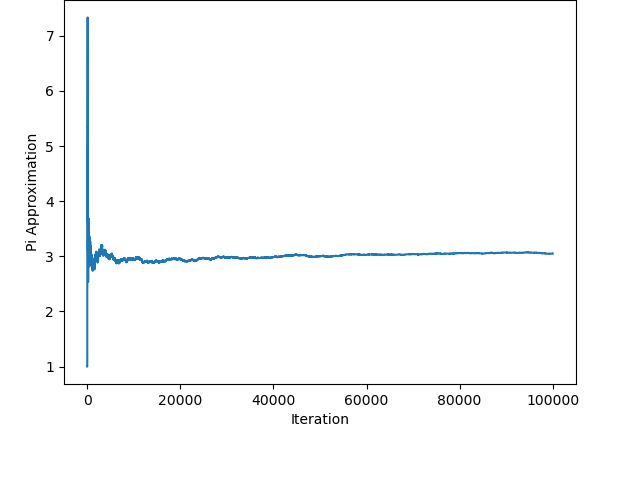

In [6]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.8, 0.8])
ax.set_xlabel('Iteration')
ax.set_ylabel('Pi Approximation')
ax.set_title('Calculation of Pi via Monte Carlo Method.')
ax.plot(df["Pi"])


<p>The above plot shows how as you increase the number of particles placed randomly in the bounds of the simulation, the resultant calculation of Pi becomes closer to Pi.</p> 

<p>Let's examine this plot a with greater detail to demonstrate how the calculation of Pi evolves with a greater sample size</p>

<IPython.core.display.Javascript object>


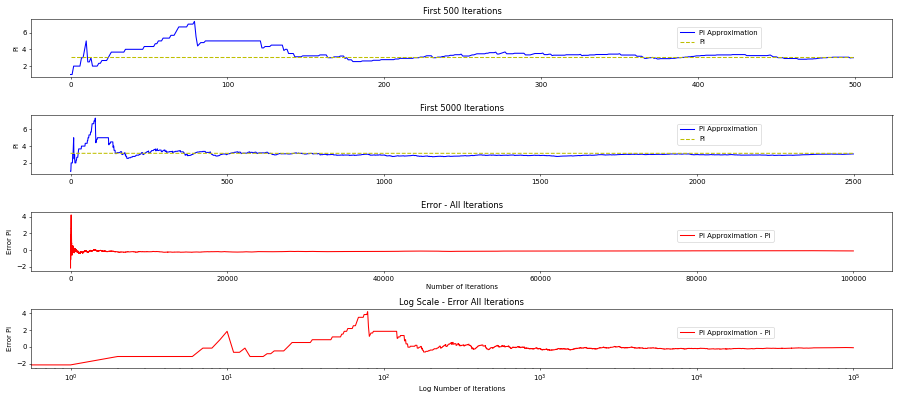

In [7]:
#lets zoom in a little to demonstrate how with more iterations the calulation of pi trends to zero
xlims = [500, 2500, 9000, 9000] 

horiz_line_data1 = np.array([np.pi for i in range(xlims[0])])
horiz_line_data2 = np.array([np.pi for i in range(xlims[1])])
horiz_line_data3 = np.array([np.pi for i in range(xlims[2])])


titles= ["First 500 Iterations", "First 5000 Iterations", "Error - All Iterations", "Log Scale - Error All Iterations"]
datasets = [
            [df["Pi"][:500], horiz_line_data1],
            [df["Pi"][:2500], horiz_line_data2],
            [df["Pi"]- np.pi],
            [df["Pi"]- np.pi],
           ]
            
labels = [["Pi Approximation", "Pi"],["Pi Approximation", "Pi"], ["Pi Approximation - Pi"], ["Pi Approximation - Pi"] ]
xLabels = ["", "", "Number of Iterations", "Log Number of Iterations"]
yLabels = ["Pi", "Pi", "Error Pi", "Error Pi"]
figColours = [["b", "y"], ["b", "y"], "r", "r"]
lineStyles = [["-", "--"], ["-", "--"], ["-"], ["-"]]
scales = [[], [], [], ["log", 10]]

fig,axes = plt.subplots(nrows=len(titles),figsize=(18,8), dpi=50)


i =0
for ax in axes:
    j = 0
    for ds in datasets[i]:      
        ax.plot(ds, figColours[i][j], label=labels[i][j], linestyle=lineStyles[i][j])
        j = j +1
    ax.set_xlabel(xLabels[i])
    ax.set_ylabel(yLabels[i])
    ax.set_title(titles[i])
    ax.legend(loc=(0.75,0.5))
    if(len(scales[i]) > 0):
        ax.set_xscale(scales[i][0], base=scales[i][1])
    i = i + 1


plt.tight_layout()

<p>The above plots show how the variation in the calulation of Pi rapidly falls after the first 1000 or so iterations</p>


<h2>Structural self-assembly</h2>

<p>Lets move onto something abit more involved, lets create a simulation where a number of particles are suspended in a vacuum with no external forces acting upon them. Lets assume that these particles interact with each other via a simple attractive force to start, where the interaction energy decreases proportionally with inter-particle distance.</p>
<br/>    
<p>If we were to suspend a number of particles in these conditions, in accordance with the Principle of Minimum Energy, i.e. the second law of thermodynamics, over time the collection of particles should self-assemble into a configuration which minimises the total energy of the system. This self assembly can be simulated via a Monte Carlo approch.</p>
<br/>
<p>If we calculate the sum of the interaction energies of the all inter-particle relationships (ensamble energy), move a random particle by a small distance, in a random direction and recalculate the ensamble energy. We can then either accept the move if the energy of the system has reduced, or decline the move if the energy of the system increased. In order to avoid reaching local energetic minima as oppoed to the global minima we should accept moves, even when the energy of the system increased, randomly with a certain liklihood. As more iterations are added to the system, the particles will self assemble into a structure with a minimal the ensamble energy. The spatial properties of this structure will reflect the interaction energy which is imposed upon it, lets start with the aforementioned proportional relationship between inter-particle energy and interparticle distance. </p>


<IPython.core.display.Javascript object>


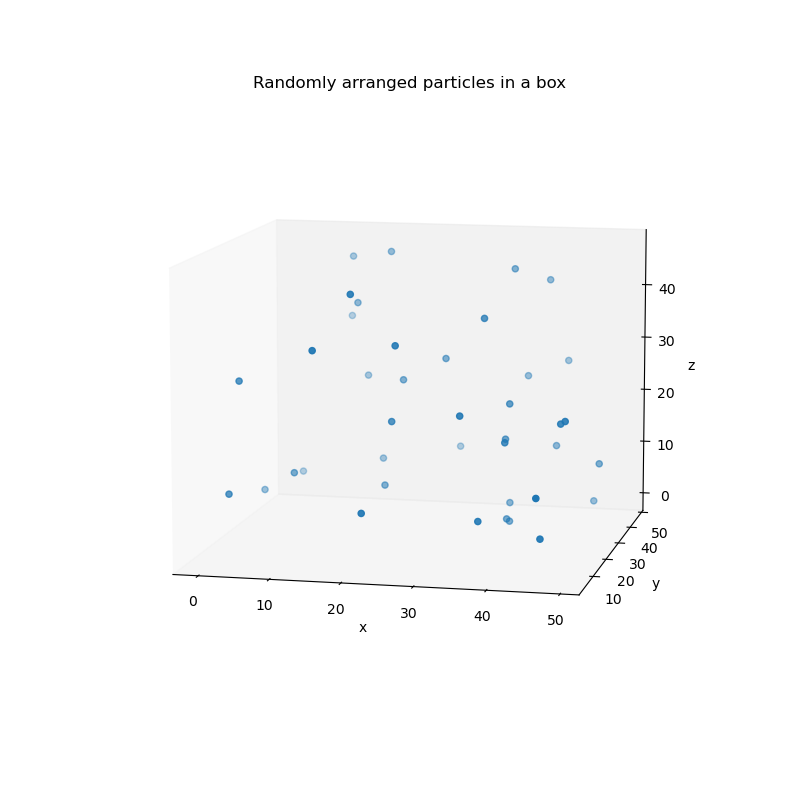

In [8]:
#First of all, lets initialise a 3D random collection of particles. 

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook


def ShowScatter(data):
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title("Randomly arranged particles in a box")
    ax.grid(False)
    ax.scatter3D(data['x'], data['y'], data['z'], zdir='z')
    plt.show()
    
SimBoxSize = 50
numberOfParticles = 40    
coords = np.random.randint(SimBoxSize, size=(numberOfParticles, 3))#*SimBoxSize
df = pd.DataFrame(coords, columns=['x', 'y', 'z'])


ShowScatter(df)

In [9]:
#Now we need to look at actually generating some data - lets first define a function which determines an interaction energy 
#between two particles - given each particle is a 1x3 numpy matrix

def IntEnrg(p1, p2):
    dist = np.sqrt(np.sum((p1-p2)**2, axis =0))
    return EnrgFunc(dist)
    
# for a proof of concept lets suppose we have a attractive force such that the energy of the system increases with distance   
def EnrgFunc(d):
    return d


#Now Lets Sum the interaction energies between the first particle and the others


import timeit


starttime = timeit.default_timer()


tot = 0
for i in range(len(df)):
    for j in range(len(df)):
        if(i is not j):
            tot = tot + (IntEnrg(np.array(df.loc[i]), np.array(df.loc[j])))
print("The time difference is :", timeit.default_timer() - starttime)
print("energy of system = " + str(tot))


The time difference is : 0.2438560000000507
energy of system = 52346.12827349117


<p>This method of calculating the ensamble energy is very slow - See if we can improve. Easy win is to only calculate interaction energies once per particle pairing</p>
    

In [10]:
#This method of calculating the ensamble energy is very slow - See if we can improve

starttime = timeit.default_timer()

tot = 0    
for i in range(len(df)):
    for j in range(i, len(df)):
        if(i is not j):
            tot = tot +  (IntEnrg(np.array(df.loc[i]), np.array(df.loc[j])))                    
print("The time difference is :", timeit.default_timer() - starttime)
print("energy of system = " + str(tot))

The time difference is : 0.12291740000000573
energy of system = 26173.064136745557


<p>As expected the computational cost has about halved, however it is probably not necessary to calculate the entire ensamble energy every time we move a particle. Instead we can select a smaller randomised sample of the particle collection, and then determine then calculate the sum of the interaction energies in this group instead. Whilst this will be less accurate when calculating the energy of the entire system, it should still provide a means of determining whether moving a particle causes an increase or decrease in the total energy of the system sufficiently well, this binary is what drives the self assembly of the strucutre so by reducing the computation here, we will be able to propose a greater number of particle moves overall. </p>

In [11]:
starttime = timeit.default_timer()

sampleSize = 10

tot = 0    
iSample1 = np.random.randint(numberOfParticles, size=sampleSize)
iSample2 = np.random.randint(numberOfParticles, size=sampleSize)


tot = 0    
for i in iSample1:
    for j in iSample2:
        if(i is not j):
            tot = tot +  (IntEnrg(np.array(df.loc[i]), np.array(df.loc[j])))                    
print("The time difference is :", timeit.default_timer() - starttime)
print("energy of system = " + str(tot))




The time difference is : 0.01809259999981805
energy of system = 3067.4593486736258


<p>This has now cut the computational cost by around 200-fold to. More selective sample could be use to improve this effecency further - for instance only selecting particles within a certain distance of one another - however the above method will do for the time being. The next step is to select a random particle, move it by a random distance and then calculate the energy again, and hence and determine whether this particle should remain moved or not. </p>

In [17]:
def CalcEnrgyCollection(pos, SampleSize):
    iSample1 = np.random.randint(numberOfParticles, size=SampleSize)
    iSample2 = np.random.randint(numberOfParticles, size=SampleSize)

    tot = 0    
    for i in iSample1:
        for j in iSample2:
            if(i is not j):
                tot = tot +  (IntEnrg(np.array(pos.loc[i]), np.array(pos.loc[j]))) 

    return tot
                
            
def TryParticleMove(InitialSet, MaxMove, ChanceToReject, SampleSize):
          
    particleToMovePosIndex = np.random.randint(numberOfParticles)
    
    alteredSet = InitialSet["pos"].copy(deep=True)
    
    alteredSet.loc[particleToMovePosIndex]["x"] = alteredSet.loc[particleToMovePosIndex]["x"] + np.random.uniform(-MaxMove,MaxMove)
    alteredSet.loc[particleToMovePosIndex]["y"] = alteredSet.loc[particleToMovePosIndex]["y"] + np.random.uniform(-MaxMove,MaxMove)
    alteredSet.loc[particleToMovePosIndex]["z"] = alteredSet.loc[particleToMovePosIndex]["z"] + np.random.uniform(-MaxMove,MaxMove)
           
    totAfterMove = CalcEnrgyCollection(alteredSet, SampleSize)    
     
    if(totAfterMove < InitialSet["energy"] or np.random.uniform(0,1) > ChanceToReject):
        return {"pos":alteredSet, "energy":totAfterMove}
    else:
        return {"pos": InitialSet["pos"], "energy":InitialSet["energy"]}
       
        

<p>We can now attempt movng particles and based off the change in the ensambles energy accept or reject the moves. So now we can look at visualising the evolution of these particles self-assembly.</p>

In [ ]:
sampleSize = 10
numberOfIterations = 50000
It1 = {"pos":df, "energy":CalcEnrgyCollection(df, sampleSize)}

Results =[]
Results.append(TryParticleMove(It1,3, 0.95, sampleSize))

for i in range(1, numberOfIterations):
    if(i%(numberOfIterations/10) == 0):
        print(str(100*i/numberOfIterations) + " % complete")
    Results.append(TryParticleMove(Results[i-1],2, 0.95, sampleSize))


10.0 % complete
20.0 % complete
30.0 % complete
40.0 % complete
50.0 % complete
60.0 % complete
70.0 % complete


<IPython.core.display.Javascript object>


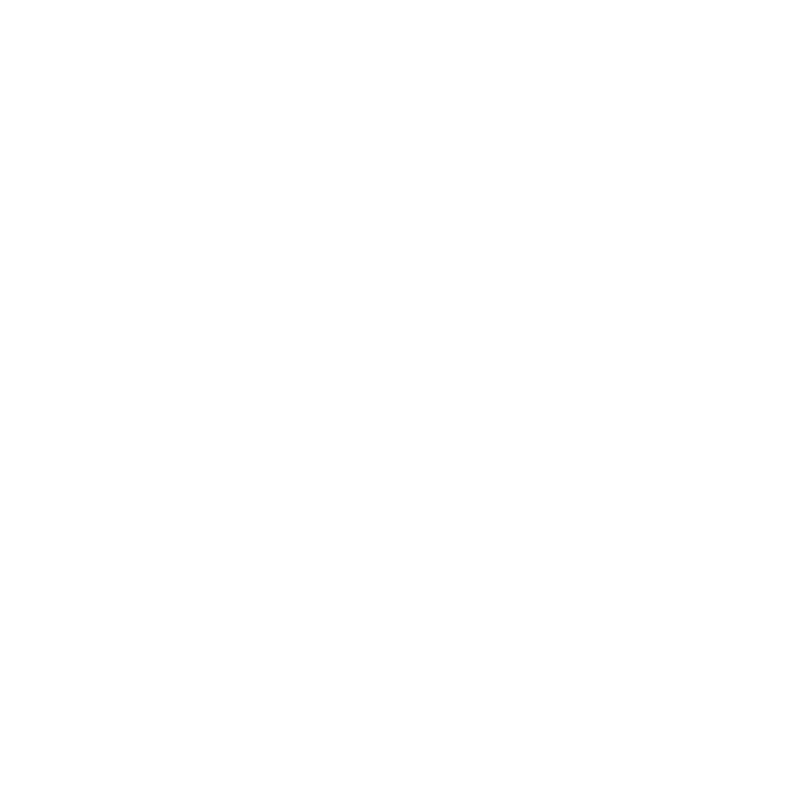

    x   y   z
0  41   5  14
1   7   3  29
2  19   4   2
3   3  24  44
4  20  18  44


IndexError: list index out of range

In [6]:
# Lets see how the particles move closer together over time...

ShowScatter(Results[0]["pos"])

plt.show()

print(Results[0]["pos"].head())
print(Results[5000]["pos"].head())



<IPython.core.display.Javascript object>


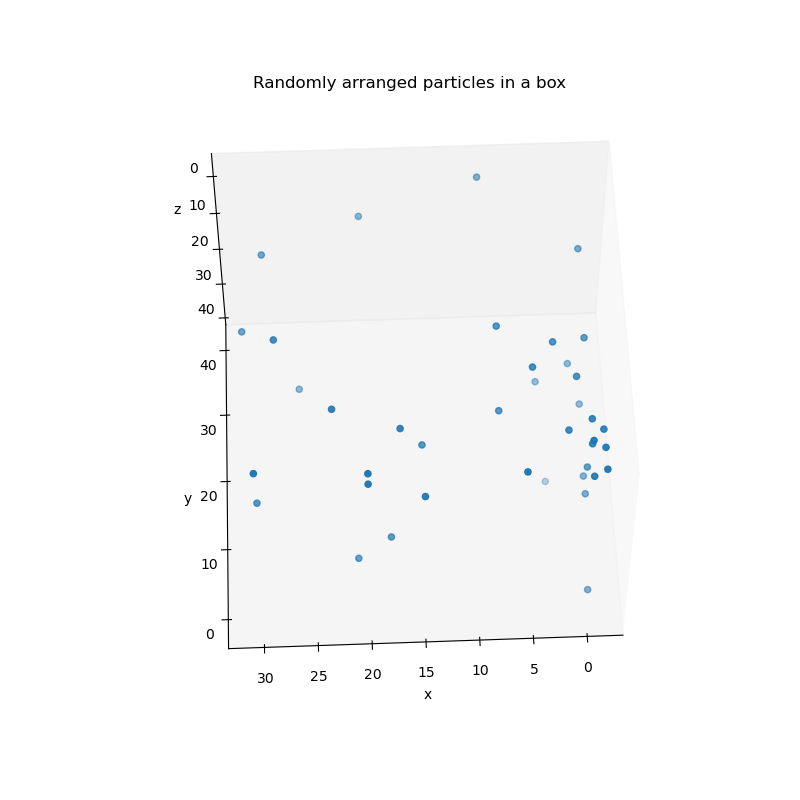

In [183]:
ShowScatter(Results[10000]["pos"])

<IPython.core.display.Javascript object>


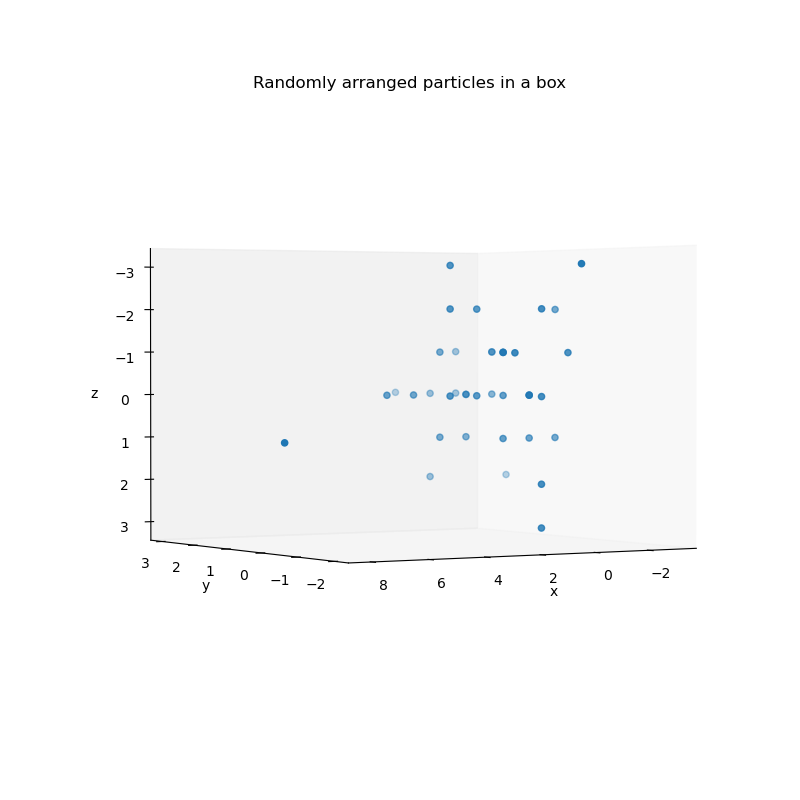

In [184]:
ShowScatter(Results[40000]["pos"])

<IPython.core.display.Javascript object>


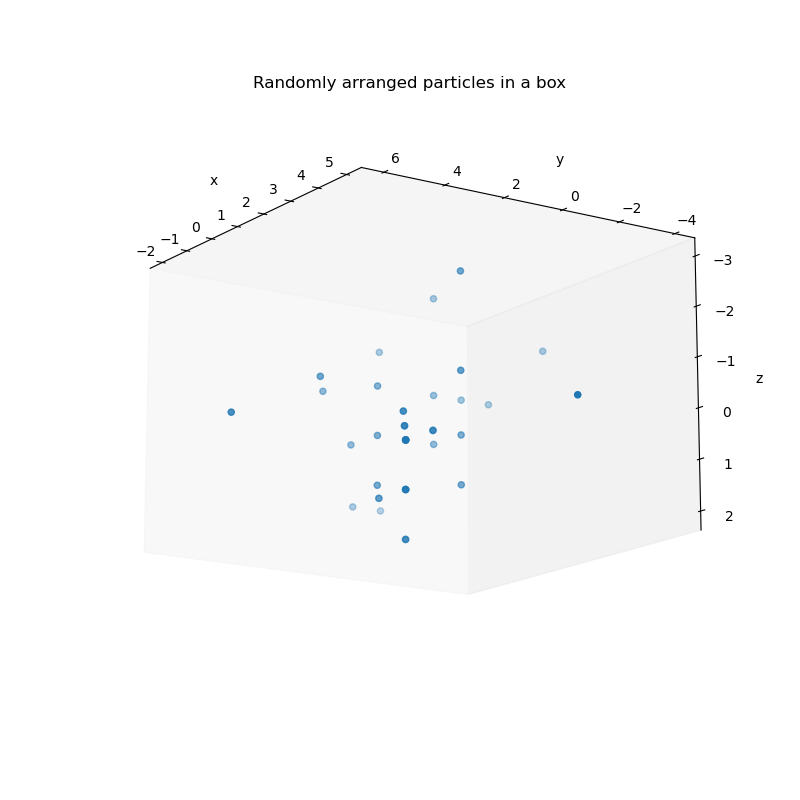

In [185]:
ShowScatter(Results[74999]["pos"])

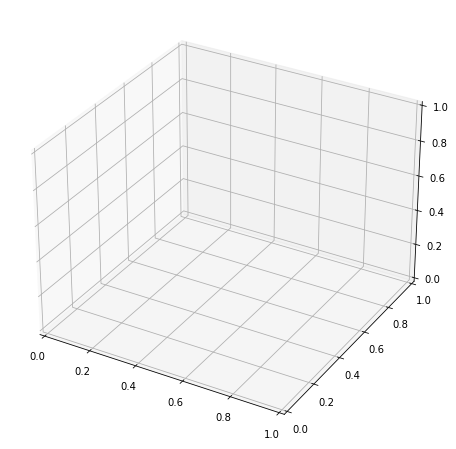

In [1]:
#Lets make an animation out of the above results
import matplotlib.animation
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
Skip = 25

def update_graph(i, fig, ax):
#    ax.remove()
    ax.clear()
    ax.grid(False)
    ax.set_zlim(0, 50)
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 50)
    ax.scatter(Results[i*50]["pos"]['x'], Results[i*50]["pos"]['y'], Results[i*50]["pos"]['z'],zdir='z')
   # return fig,ax

Writer = matplotlib.animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, frames=1500, fargs=(fig,ax), interval=1,  repeat=False)
plt.show()

#ani.save('SelfAssembly.mp4', writer=writer)



<IPython.core.display.Javascript object>


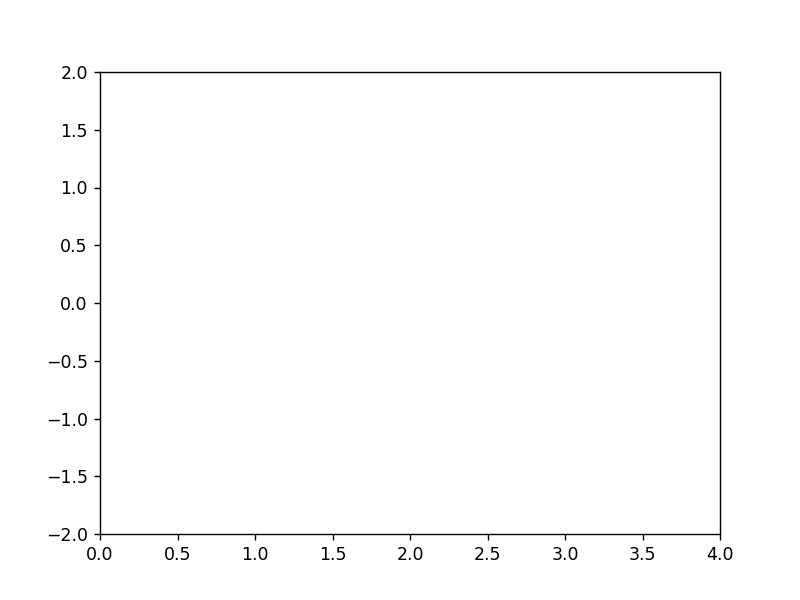

In [11]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as manimation
plt.style.use('seaborn-pastel')
%matplotlib notebook


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

with writer.saving(fig, 'myfile.mp4', dpi=100):
    for j in range(200):
        animate(j)
        writer.grab_frame()

##Look at https://matplotlib.org/stable/api/animation_api.html to find why this is not properly saving.




In [12]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0, y0 = 0, 0

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(100):
        x0 += 0.1 * np.random.randn()
        y0 += 0.1 * np.random.randn()
        l.set_data(x0, y0)
        writer.grab_frame()